In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Parameter Configuration

In [52]:
nx = 1000; # number of grid points in x-direction
dx = 0.5; # grid point distance in x-direction
c0 = 333.; # wave speed in medium (m/s)
isrc = 500; # source location in grid in x-direction
ir = 730; # receiver location in grid in x-direction
nt = 1000; # maximum number of time steps
dt = 0.0010; # time step
# CFL Stability Criterion
eps = c0 * dt / dx; # epsilon value
# This should be less than 1
print('Stability criterion = ', eps)

Stability criterion =  0.666


### Plot Source Time Function

Source frequency =  25.0  Hz


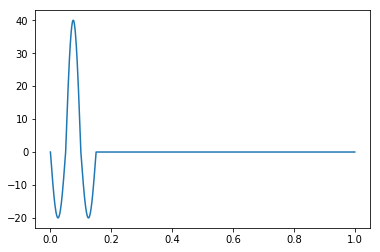

In [53]:
f0 = 25.; # dominant frequency of the source (Hz)
t0 = 4. / f0; # source time shift
print('Source frequency = ', f0, ' Hz')
# Source time function (Gaussian)
src = np.zeros(nt)
time = np.linspace(0 * dt, nt * dt, nt)
# 1st derivative of a Gaussian
# src = -2. * (time - t0) * (f0.^2) .* (exp(-1.0 * (f0.^2)* (time - t0).^2));
from numpy import sin, pi
src[0:50] = -20*sin(2*pi*10*time[0:50]);
src[50:100] = -40*sin(2*pi*10*time[50:100]);
src[100:150] = -20*sin(2*pi*10*time[100:150]);
plt.plot(time,src)
plt.show()


In [54]:
# Initialize empty pressure
p = np.zeros(nx) # p at time n (now)
pold = np.zeros(nx) # p at time n-1 (past)
pnew = np.zeros(nx) # p at time n+1 (present)
d2px = np.zeros(nx) # 2nd space derivative of p
# Initialize model (assume homogeneous model)
c = np.zeros(nx);
c = c + c0 # initialize wave velocity in model

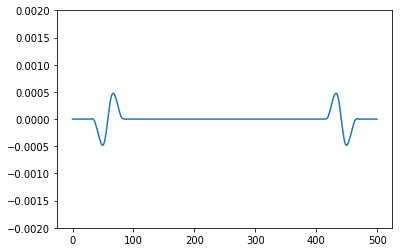

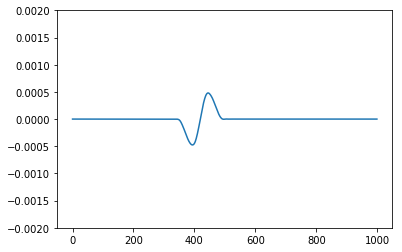

In [55]:
# Initialize coordinate
x = np.arange(nx);
x = x * dx # coordinate in x-direction
# Initialize empty seismogram
seis = np.zeros(nt);

for n in range(nt):
    for j in range(1,nx-1):
        # compute double derivative of p w.r.t x (d2p/dx2)
        d2px[j] = (p[j+1] -2*p[j] + p[j-1])/(dx**2);
        
    #Time extrapolation
    pnew = 2*p - pold + (dt**2)*(c**2*d2px);
    
    # Add Source Term at isrc (Source Location)
    # Absolute pressure w.r.t analytical solution
    # ***************************************************************************************
    pnew[isrc] = pnew[isrc] + (dt**2 * src[n])                            # (Source Location)
    # ***************************************************************************************
    
    #Remap Time Levels
    pold = p
    p = pnew
    
    # Output Seismogram
    seis[n] = p[ir];
    
    #plt.plot(x,p)
    #plt.pause(0.001)
    #plt.ylim([-2e-3 ,2e-3])
    #plt.show()
    
plt.plot(x,p)
#plt.pause(0.001)
plt.ylim([-2e-3 ,2e-3])
plt.show()


t = np.arange(nt);
t = t
plt.plot(seis)
plt.ylim([-2e-3 ,2e-3])
plt.show()
    